#Heart Disease Detection

This notebook is used for explaining the steps involved in doing Heart Disease Detection using Support Vector Machine

1. Import the required libraries
2. Download the Dataset
3. Read the Dataset 
4. Observe the Dataset
5. Data Preprocessing
6. Observing Pair Plots between features 
7. Creating features and target sets
8. Splitting the data in train and test sets
9. Creating the model
10. Training the model
11. Making predictions on test set
12. Printing the accuracy score on test set

##Import the required libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile 
from sklearn.model_selection import train_test_split
from sklearn import svm                          
from sklearn.metrics import classification_report

##Download the dataset

In [67]:
!gdown --id 1dxLl4tfHClLoiO8PtNulmi8f6y6GFDiV

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1dxLl4tfHClLoiO8PtNulmi8f6y6GFDiV
To: /content/heart_disease_data.zip
100% 56.1k/56.1k [00:00<00:00, 53.6MB/s]


In [68]:
# This library will deal with extracting zipfiles
with zipfile.ZipFile("/content/heart_disease_data.zip","r") as zip_ref:        
    zip_ref.extractall("/content") 

##Read the dataset

In [69]:
data = pd.read_csv('/content/heart_data.csv')

##Observe the dataset

In [70]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


##Data Preprocessing

In [72]:
for (field_Name, field_Data) in data.iteritems():
  cond=False
  for i in field_Data.values:
    if i!=i:
      cond=True
      break
  if cond==True:
    print(field_Name)

education
cigsPerDay
BPMeds
totChol
BMI
heartRate
glucose


In [73]:
data['education'] = data['education'].fillna(data['education'].median())
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].median())
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].median())
data['totChol'] = data['totChol'].fillna(data['totChol'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].median())
data['heartRate'] = data['heartRate'].fillna(data['heartRate'].median())
data['glucose'] = data['glucose'].fillna(data['glucose'].median())

In [74]:
for (field_Name, field_Data) in data.iteritems():
  cond=False
  for i in field_Data.values:
    if i!=i:
      cond=True
      break
  if cond==True:
    print(field_Name)

##Observing Pair Plots between features 

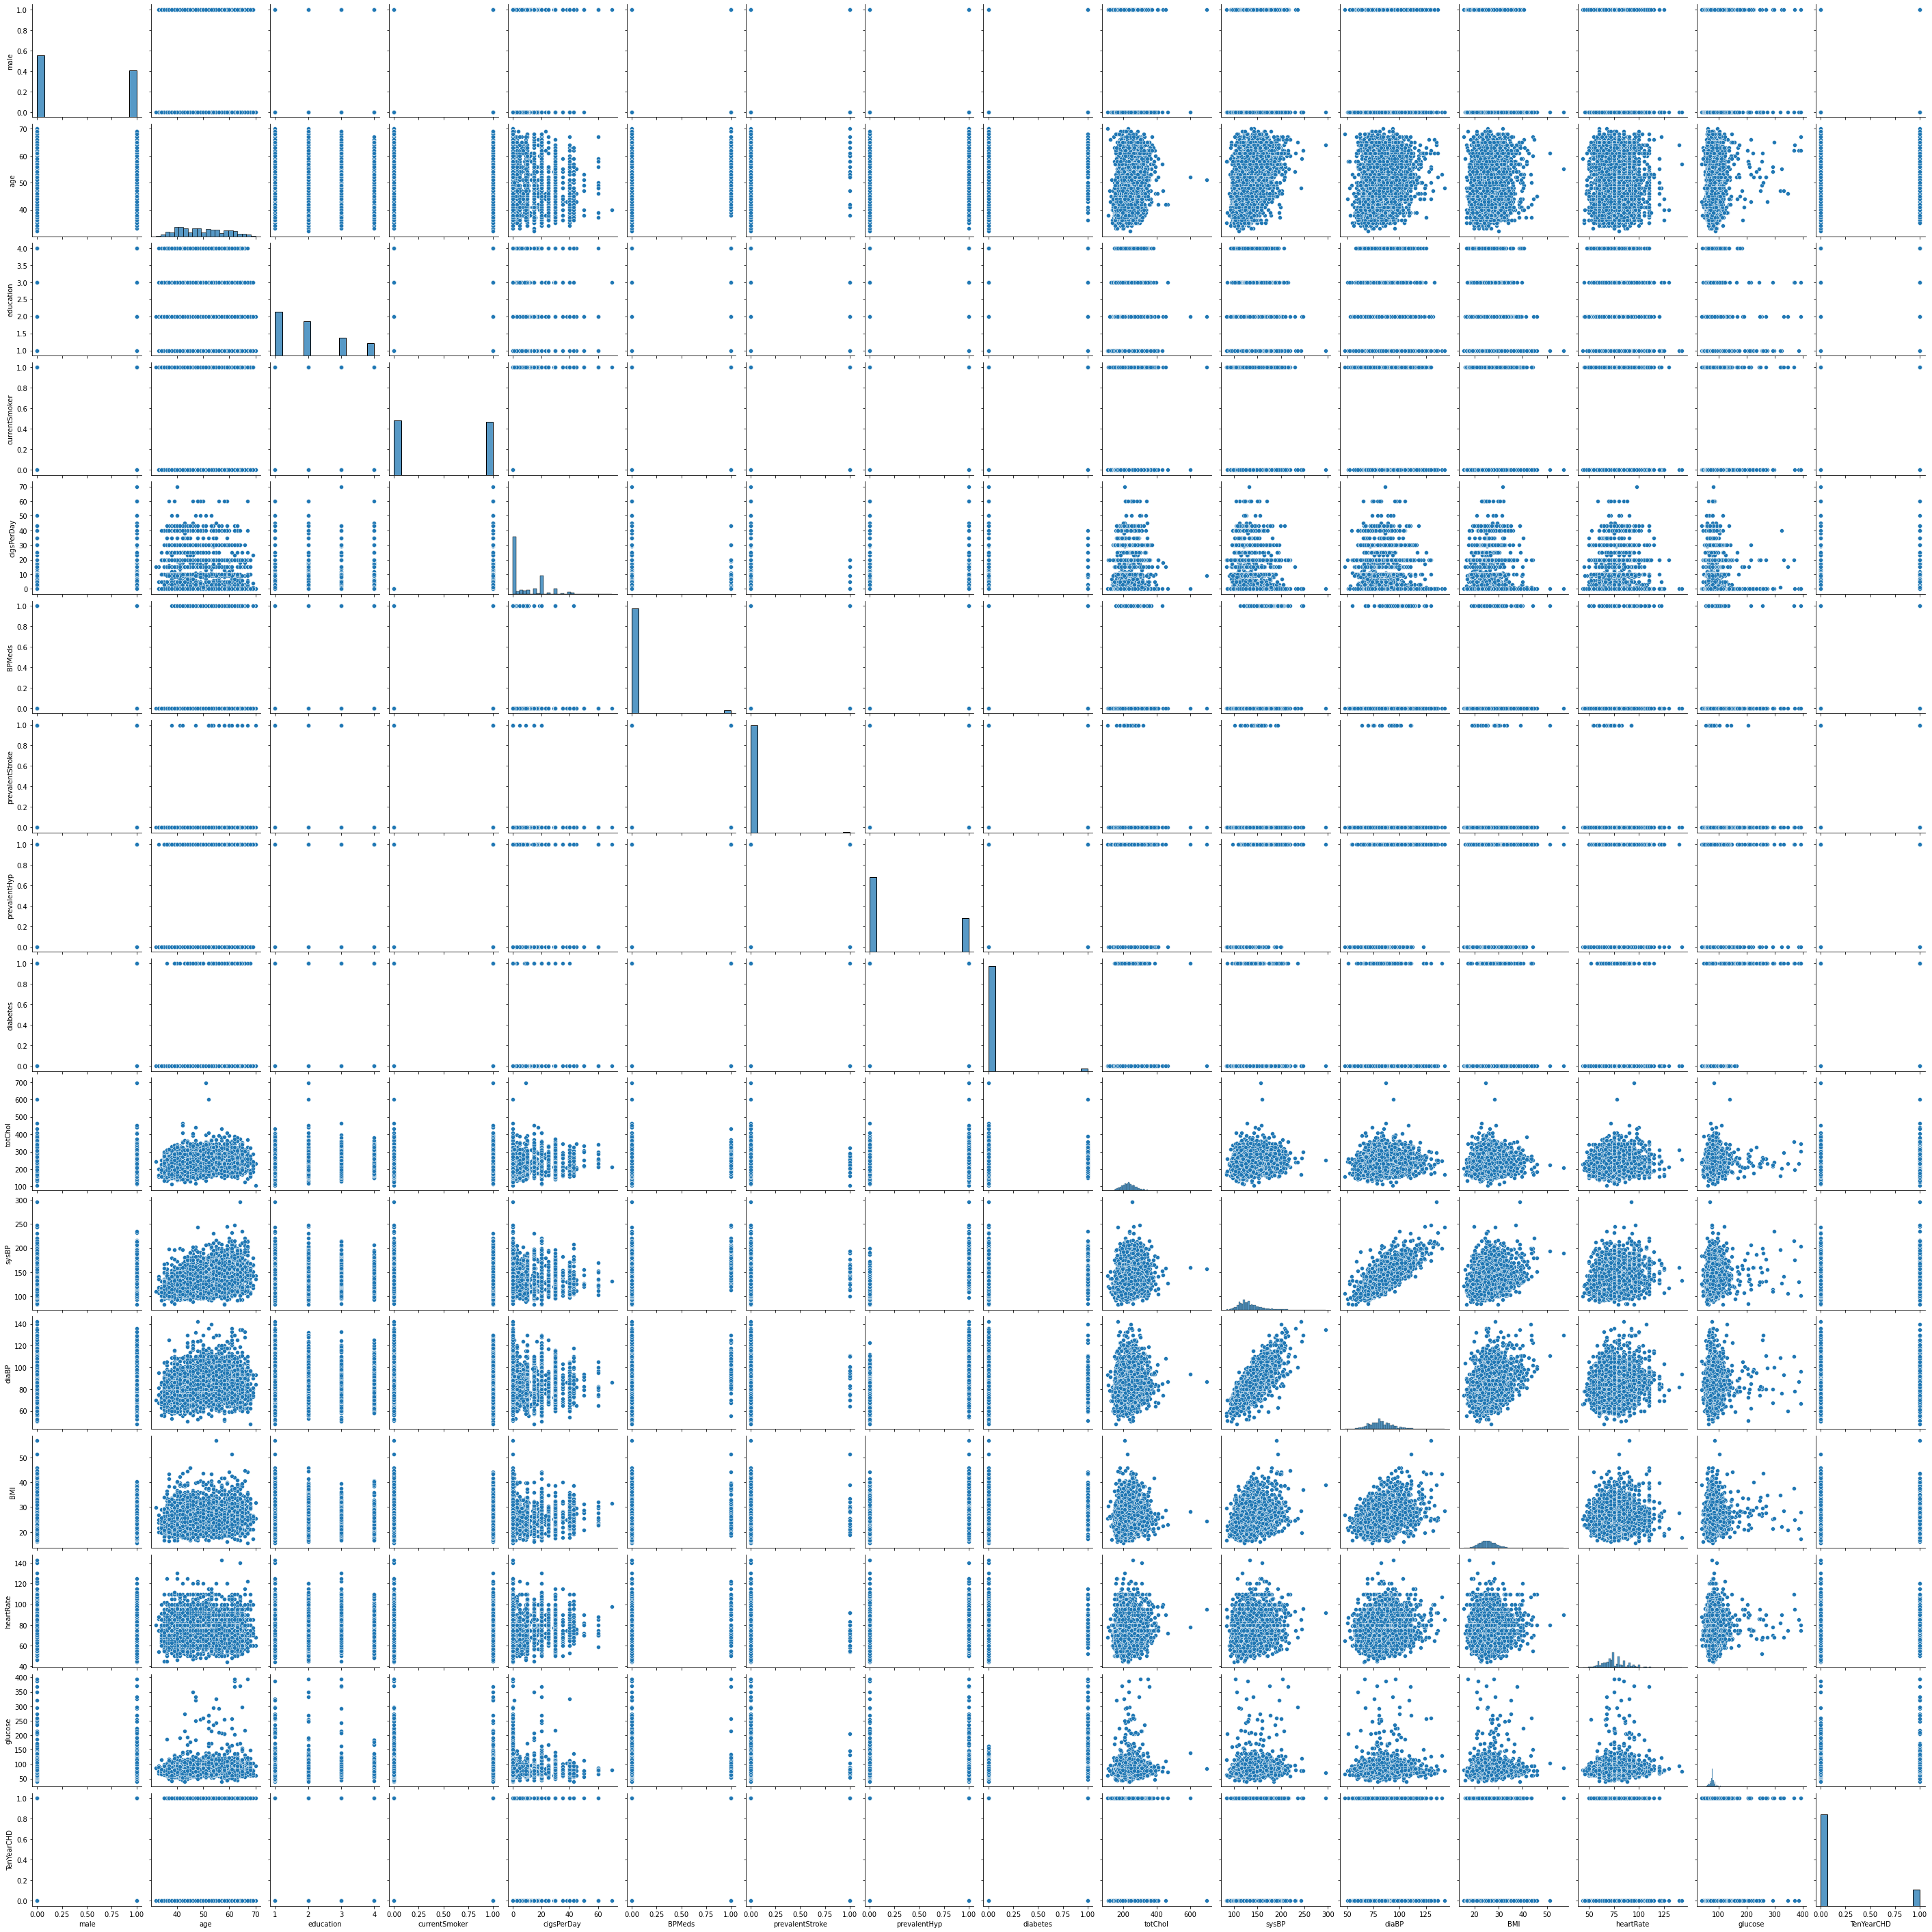

In [75]:
sns.pairplot(data)
plt.show() 

##Creating features and target sets

In [76]:
y = data['TenYearCHD']
data = data.drop('TenYearCHD', axis=1)
X=data

In [77]:
X=np.array(X)
y=np.array(y)

##Splitting the data in train and test sets

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=53)

##Creating the SVM model

In [79]:
svc = svm.SVC(kernel='linear', C=1,gamma=0.5)

##Training the SVM model

In [80]:
svc.fit(X_train, y_train)

SVC(C=1, gamma=0.5, kernel='linear')

##Making predictions on test set

In [81]:
y_pred = svc.predict(X_test)

##Printing the accuracy score on test set

In [82]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       848
           1       0.00      0.00      0.00         0

    accuracy                           0.83       848
   macro avg       0.50      0.42      0.45       848
weighted avg       1.00      0.83      0.91       848



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
